# Meteorologie hautnah – Mobile Stadtklimamessungen als Citizen Science-Projekt
*Oscar Ritter und Johannes Röttenbacher*


In [292]:
%matplotlib inline
# import modules
import os

import cartopy.crs as ccrs
import cartopy.io.img_tiles as cimgt
import cmasher as cm
from matplotlib.ticker import FuncFormatter
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns

import meteohautnah.meteohautnah as mh


def thousands(x, pos):
    """The two arguments are the value and tick position."""
    return f'{x * 1e-3:1.0f}'


In [293]:
# set paths
base_path = 'C:/Users/Johannes/Documents/MeteorologieHautnah/MeteorologieHautnah'
data_path = f'{base_path}/Daten/processed'
plot_path = f'{base_path}/Daten/plots/stumeta'
os.makedirs(plot_path, exist_ok=True)

In [294]:
group1 = ['04', '05', '06', '07', '19', '20', 'MT2', 'MT5', 'MT9', 'X03']
group2 = ['21', '22', '26', '27', '28', '29', '30', '31', 'X05', 'X06']
iphones = ['06', '19', '20', '26', '27', '28', 'X06']


In [295]:
# read in and filter data
device_ids = pd.read_csv(f'{base_path}/Daten/device_ids.txt',
                         skipinitialspace=True,
                         )
device_ids = device_ids[device_ids['number'].isin(group1 + group2)]
device_ids["Gruppe"] = np.where(device_ids["number"].isin(group1), 1, 2)
dev_id_col = list()
for n in device_ids['number']:
    if n in iphones:
        dev_id_col.append(device_ids[device_ids['number'] == n]['UUID2'].to_numpy()[0])
    else:
        dev_id_col.append(device_ids[device_ids['number'] == n]['MAC-address'].to_numpy()[0])

device_ids['device_id'] = dev_id_col

In [296]:
df = mh.read_data(data_path,
                  date='2024-05-09',
                  speedfilter=0)
df = df.merge(device_ids, on='device_id', how='inner')
df = df.rename({'number': 'Nummer'}, axis=1)

In [297]:
# add a column with the operating system
df['os'] = np.where(df['Nummer'].isin(iphones), 'iOS', 'Android')

## Zeitreihen der beiden Gruppen
### Lufttemperatur

C:\Users\Johannes\AppData\Local\Temp\ipykernel_13428\346759955.py:3: UserWarning: The palette list has more values (6) than needed (4), which may not be intended.
  sns.lineplot(data=df, x='time', y='air_temperature', ax=ax,


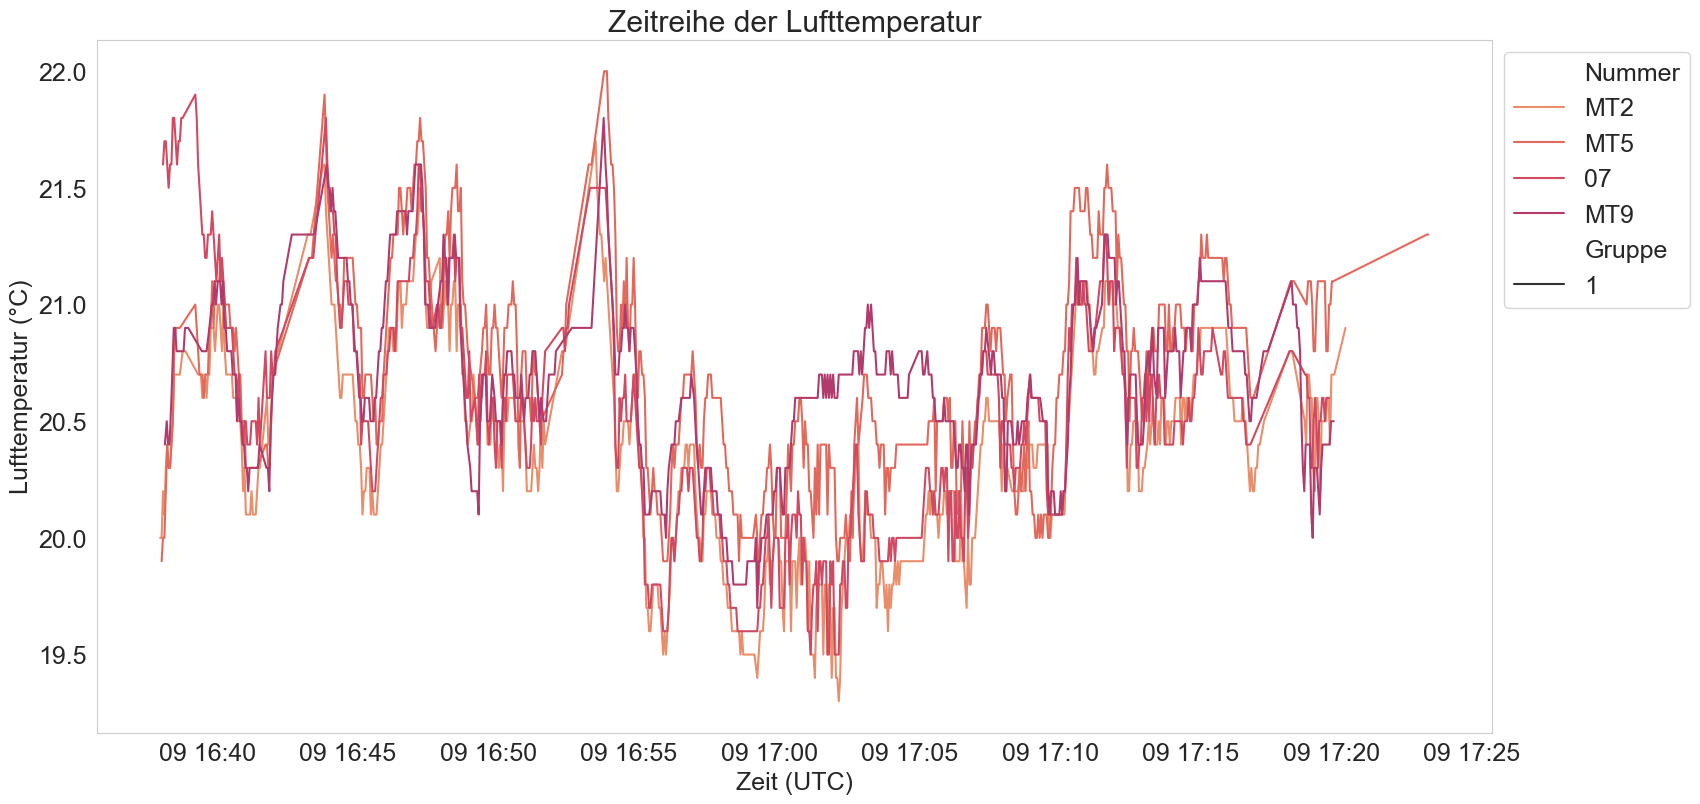

In [298]:
plt.rc('font', size=18)
_, ax = plt.subplots(figsize=(18, 9))
sns.lineplot(data=df, x='time', y='air_temperature', ax=ax,
             hue='Nummer', style='Gruppe', palette=sns.color_palette('flare'))
ax.set(
    title='Zeitreihe der Lufttemperatur',
    xlabel='Zeit (UTC)',
    ylabel='Lufttemperatur (°C)',
)
sns.move_legend(ax, "upper left", bbox_to_anchor=(1, 1))
ax.grid()
plt.show()


### Taupunkt

C:\Users\Johannes\AppData\Local\Temp\ipykernel_13428\2941136825.py:3: UserWarning: The palette list has more values (6) than needed (4), which may not be intended.
  sns.lineplot(data=df, x='time', y='dewpoint', ax=ax,
C:\Users\Johannes\AppData\Local\Temp\ipykernel_13428\2941136825.py:6: UserWarning: The palette list has more values (6) than needed (4), which may not be intended.
  sns.lineplot(data=df, x='time', y='air_temperature', ax=ax,


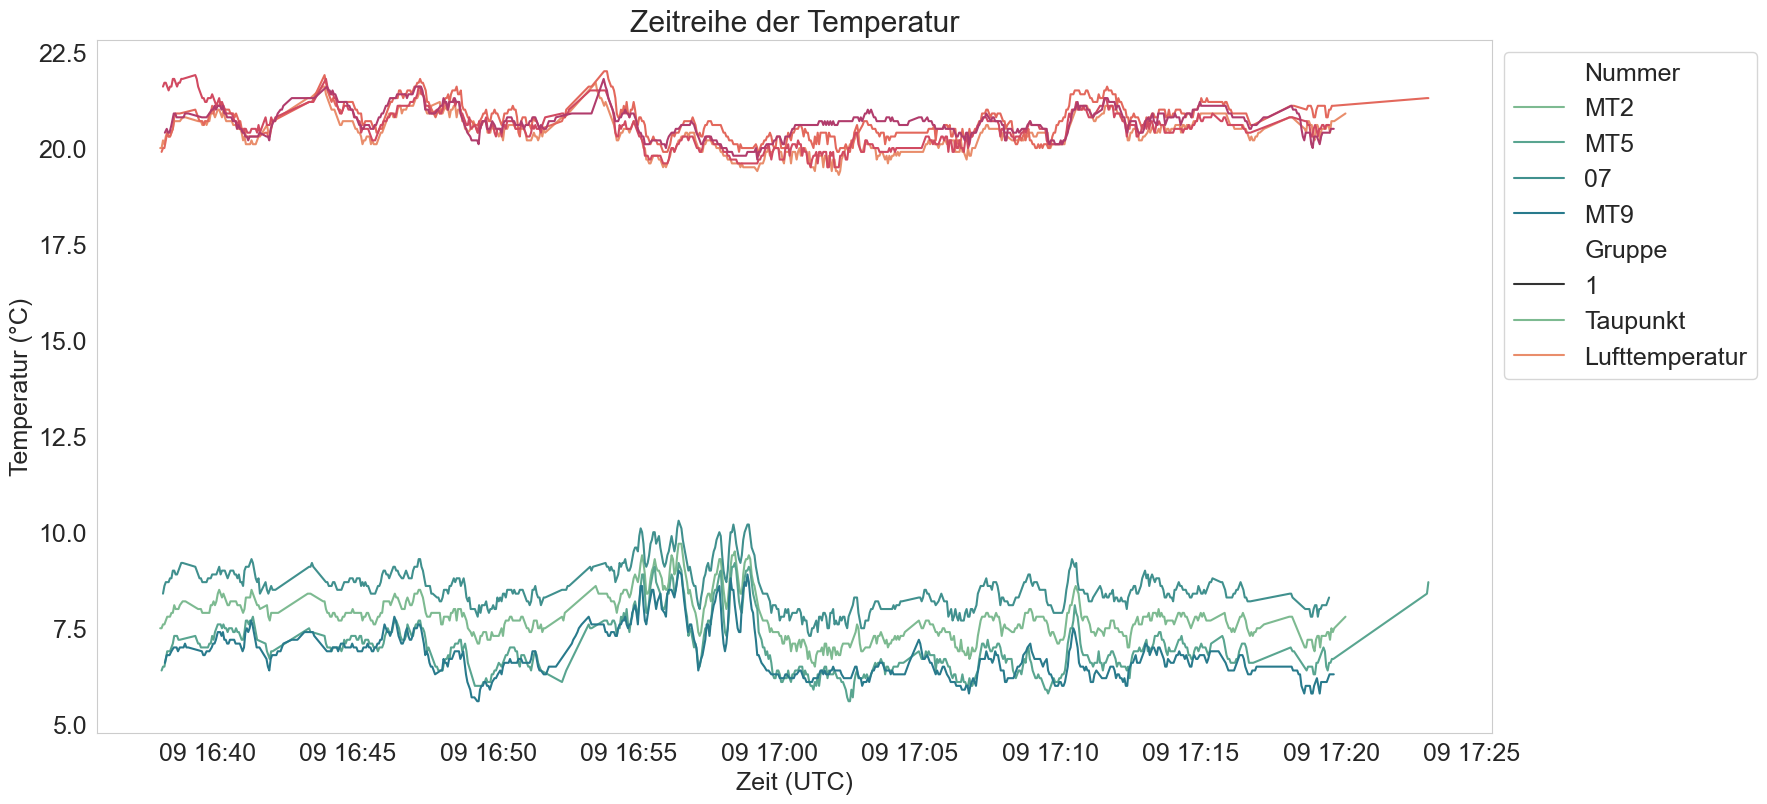

In [299]:
plt.rc('font', size=18)
_, ax = plt.subplots(figsize=(18, 9))
sns.lineplot(data=df, x='time', y='dewpoint', ax=ax,
             hue='Nummer', style='Gruppe', palette=sns.color_palette('crest'),
             )
sns.lineplot(data=df, x='time', y='air_temperature', ax=ax,
             hue='Nummer', style='Gruppe', legend=False,
             palette=sns.color_palette('flare')
             )
ax.set(
    title='Zeitreihe der Temperatur',
    xlabel='Zeit (UTC)',
    ylabel='Temperatur (°C)',
)

# make dummy for legend
ax.plot([], color=sns.color_palette('crest')[0], ls='-', label='Taupunkt')
ax.plot([], color=sns.color_palette('flare')[0], ls='-', label='Lufttemperatur')
ax.legend()
sns.move_legend(ax, "upper left", bbox_to_anchor=(1, 1))
ax.grid()
plt.show()
plt.close()

## Verteilung der Messungen

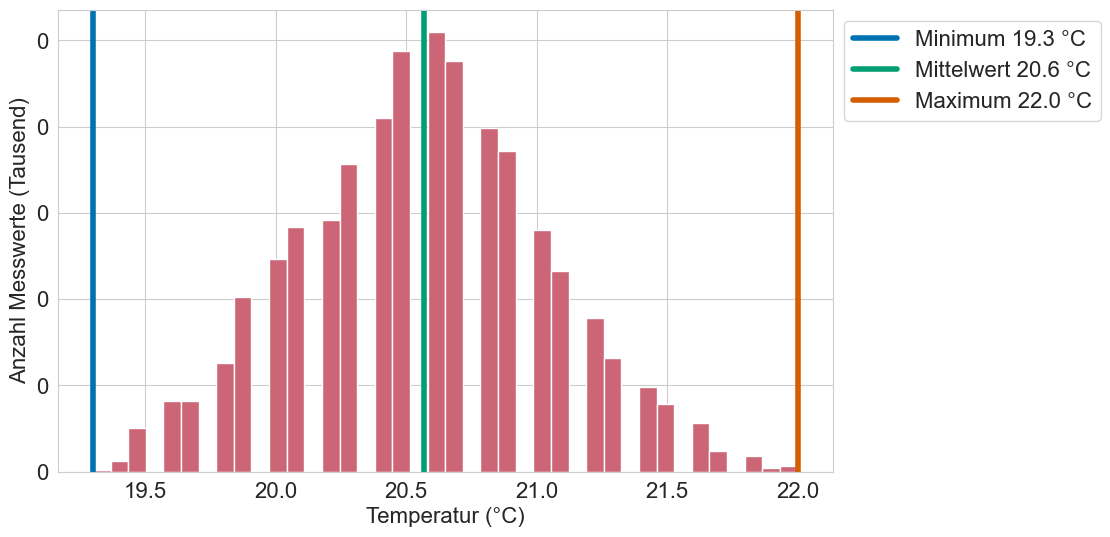

In [300]:
at_mean, at_min, at_max = df.air_temperature.mean(), df.air_temperature.min(), df.air_temperature.max()
plt.rc("font", size=16)
fig, ax = plt.subplots(figsize=(10, 6))
df.air_temperature.hist(bins=40, color="#CC6677", ax=ax)
ax.axvline(at_min, color="#0072B2", label=f"Minimum {at_min:2.1f} °C", linewidth=4)
ax.axvline(at_mean, color="#009E73", label=f"Mittelwert {at_mean:2.1f} °C", linewidth=4)
ax.axvline(at_max, color="#D55E00", label=f"Maximum {at_max:2.1f} °C", linewidth=4)
ax.set_xlabel("Temperatur (°C)")
ax.set_ylabel("Anzahl Messwerte (Tausend)")
ax.yaxis.set_major_formatter(FuncFormatter(thousands))
ax.legend(loc='upper left', bbox_to_anchor=(1, 1))
plt.show()
plt.close()

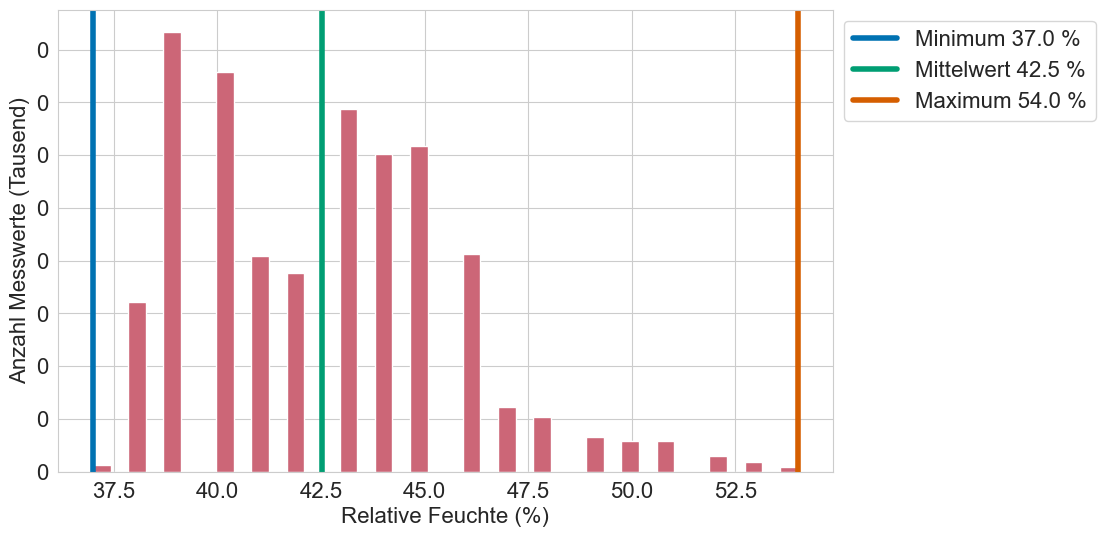

In [301]:
h_mean, h_min, h_max = df.humidity.mean(), df.humidity.min(), df.humidity.max()
plt.rc("font", size=16)
fig, ax = plt.subplots(figsize=(10, 6))
df.humidity.hist(bins=40, color="#CC6677", ax=ax)
ax.axvline(h_min, color="#0072B2", label=f"Minimum {h_min:2.1f} %", linewidth=4)
ax.axvline(h_mean, color="#009E73", label=f"Mittelwert {h_mean:2.1f} %", linewidth=4)
ax.axvline(h_max, color="#D55E00", label=f"Maximum {h_max:2.1f} %", linewidth=4)
ax.set_xlabel("Relative Feuchte (%)")
ax.set_ylabel("Anzahl Messwerte (Tausend)")
ax.yaxis.set_major_formatter(FuncFormatter(thousands))
ax.legend(loc='upper left', bbox_to_anchor=(1, 1))
plt.show()
plt.close()

## Karte mit Messpunkten

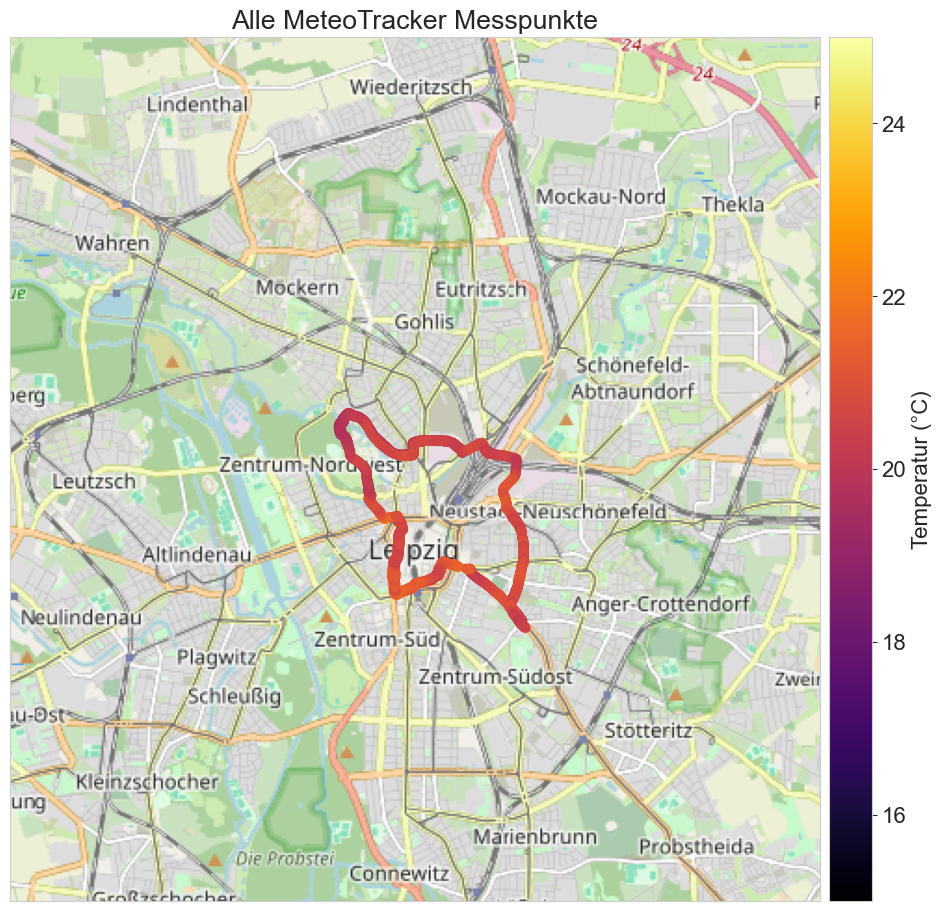

In [302]:
plot_df1 = df[df['Gruppe'] == 1]
plot_df2 = df[df['Gruppe'] == 2]
request = cimgt.OSM()
_, ax = plt.subplots(figsize=(10, 9),
                     subplot_kw=dict(projection=request.crs),
                     layout='constrained')
# extent = [12.2, 12.55, 51.16, 51.45]  # (xmin, xmax, ymin, ymax)
extent = [12.3, 12.45, 51.30, 51.4]  # (xmin, xmax, ymin, ymax)
ax.set_extent(extent)
ax.add_image(request, 12)
scatter = ax.scatter(plot_df1['lon'], plot_df1['lat'],
                     c=plot_df1['air_temperature'],
                     transform=ccrs.Geodetic(),
                     cmap='inferno', vmin=15, vmax=25,
                     marker='o')
ax.scatter(plot_df2['lon'], plot_df2['lat'],
           c=plot_df2['air_temperature'],
           transform=ccrs.Geodetic(),
           cmap='inferno', vmin=15, vmax=25,
           marker='x')
cbar = plt.colorbar(scatter, ax=ax, orientation='vertical', pad=0.01,
                    label='Temperatur (°C)')
ax.set_title('Alle MeteoTracker Messpunkte')
plt.show()


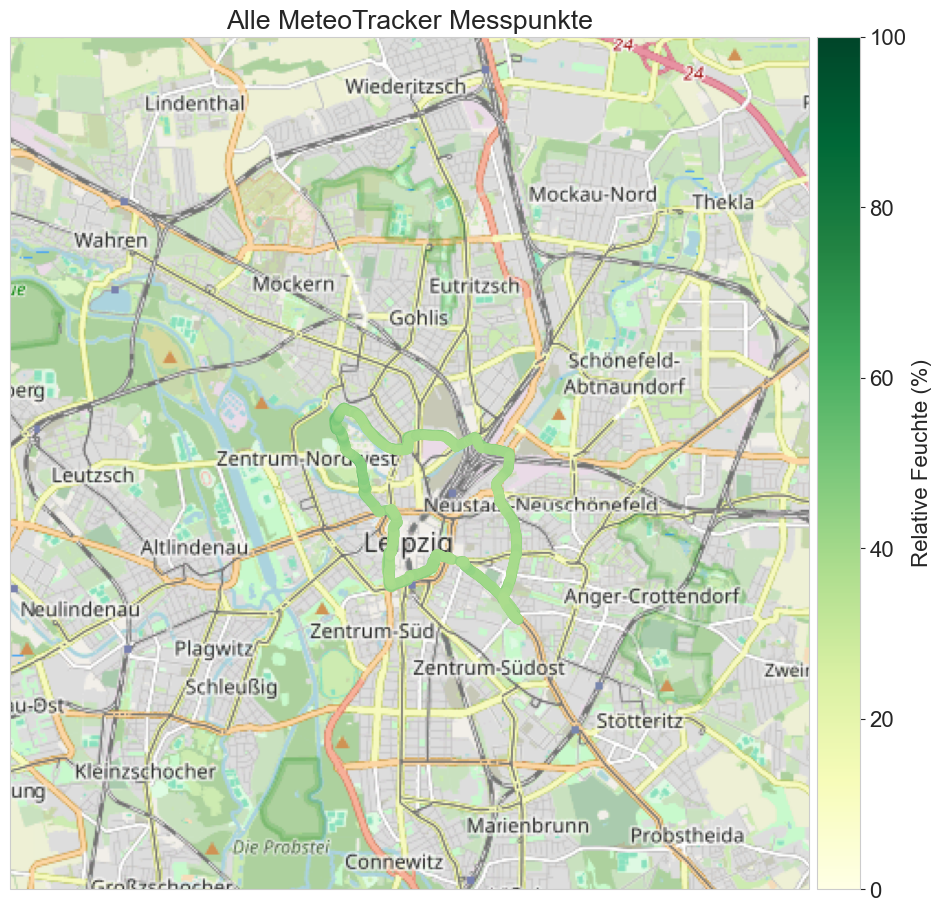

In [303]:
plot_df1 = df[df['Gruppe'] == 1]
plot_df2 = df[df['Gruppe'] == 2]
request = cimgt.OSM()
_, ax = plt.subplots(figsize=(10, 9),
                     subplot_kw=dict(projection=request.crs),
                     layout='constrained')
# extent = [12.2, 12.55, 51.16, 51.45]  # (xmin, xmax, ymin, ymax)
extent = [12.3, 12.45, 51.30, 51.4]  # (xmin, xmax, ymin, ymax)
ax.set_extent(extent)
ax.add_image(request, 12)
scatter = ax.scatter(plot_df1['lon'], plot_df1['lat'],
                     c=plot_df1['humidity'],
                     transform=ccrs.Geodetic(),
                     cmap='YlGn', vmin=0, vmax=100,
                     marker='o')
ax.scatter(plot_df2['lon'], plot_df2['lat'],
           c=plot_df2['humidity'],
           transform=ccrs.Geodetic(),
           cmap='YlGn', vmin=0, vmax=100,
           marker='x')
cbar = plt.colorbar(scatter, ax=ax, orientation='vertical', pad=0.01,
                    label='Relative Feuchte (%)')
ax.set_title('Alle MeteoTracker Messpunkte')
plt.show()


## Vergleich zur DWD Station Holzhausen

In [304]:
df_dwd = mh.station_temp(name='Leipzig-Holzhausen',
                         start_date='2024-05-09',
                         end_date='2024-05-10')
df_dwd.reset_index(drop=True, inplace=True)

In [305]:
df_dwd['device_id'] = 'DWD'
df_dwd['Gruppe'] = 'DWD'
df_dwd['Nummer'] = 'DWD'
df_dwd['time'] = df_dwd.time.dt.tz_localize('Europe/Berlin')
df = pd.concat([df, df_dwd])

C:\Users\Johannes\AppData\Local\Temp\ipykernel_13428\4153247800.py:3: UserWarning: The palette list has more values (6) than needed (5), which may not be intended.
  sns.lineplot(data=df, x='time', y='dewpoint', ax=ax,
C:\Users\Johannes\AppData\Local\Temp\ipykernel_13428\4153247800.py:6: UserWarning: The palette list has more values (6) than needed (5), which may not be intended.
  sns.lineplot(data=df, x='time', y='air_temperature', ax=ax,


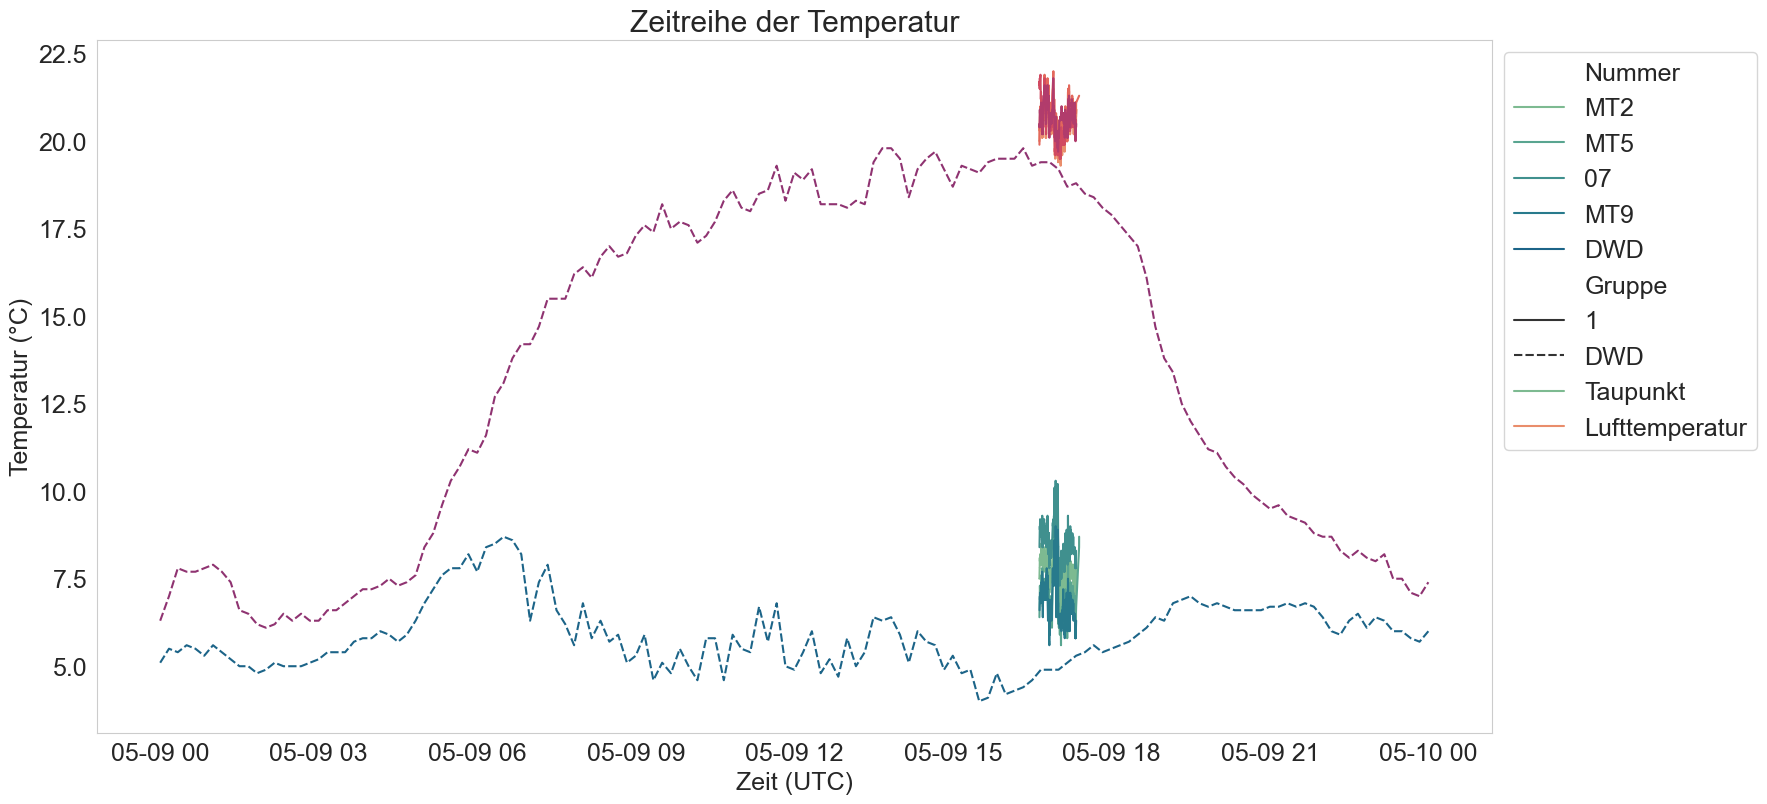

In [306]:
plt.rc('font', size=18)
_, ax = plt.subplots(figsize=(18, 9))
sns.lineplot(data=df, x='time', y='dewpoint', ax=ax,
             hue='Nummer', style='Gruppe', palette=sns.color_palette('crest'),
             )
sns.lineplot(data=df, x='time', y='air_temperature', ax=ax,
             hue='Nummer', style='Gruppe', legend=False,
             palette=sns.color_palette('flare'))
ax.set(
    title='Zeitreihe der Temperatur',
    xlabel='Zeit (UTC)',
    ylabel='Temperatur (°C)',
)
# make dummy for legend
ax.plot([], color=sns.color_palette('crest')[0], ls='-', label='Taupunkt')
ax.plot([], color=sns.color_palette('flare')[0], ls='-', label='Lufttemperatur')
ax.legend()
sns.move_legend(ax, "upper left", bbox_to_anchor=(1, 1))
ax.grid()
plt.show()

## Heatmap

In [307]:
# %% gruppiere Punkte in räumlicher Verteilung
def to_nearest(num, decimal):
    return round(num * decimal) / decimal


# coordinates of midpoint (marketplace in Leipzig)
mp_lon = 12.37534
mp_lat = 51.34038
# insert differenz of coordinates to midpoint
df['lon_diff'] = df.lon.astype(float) - mp_lon
df['lat_diff'] = df.lat.astype(float) - mp_lat
# round differenz to the nearest multiple of 4 with 3 digits precision #400
df['group_lon'] = to_nearest(df.lon_diff + mp_lon, 4000)
df['group_lat'] = to_nearest(df.lat_diff + mp_lat, 4000)
# make new df with midpoints of each cell and number of points in it
lons = df.group_lon.unique()
lats = df.group_lat.unique()

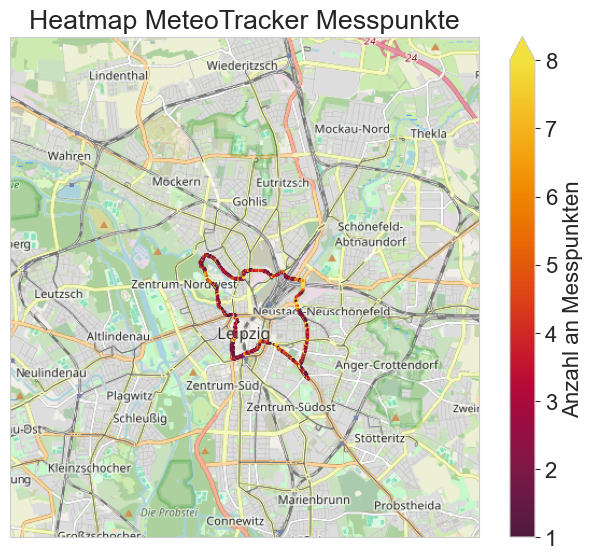

In [308]:
df_verteilung = df.groupby(['group_lon', 'group_lat'], as_index=False).agg(dict(air_temperature='count'))
df_verteilung.rename(columns={'air_temperature': 'points', 'group_lon': 'lon', 'group_lat': 'lat'}, inplace=True)

# %% plot temperature on map and add a nice colourbar
cmap = cm.get_sub_cmap(cm.ember, 0.25, 1)
plt.rc("font", size=16)
plot_df = df_verteilung  # [::100]  # subsample dataframe if needed
request = cimgt.OSM()
fig, ax = plt.subplots(figsize=(8, 6.5), subplot_kw=dict(projection=request.crs))
ax.set_extent(extent)
ax.add_image(request, 12)
scatter = ax.scatter(plot_df["lon"], plot_df["lat"],
                     c=plot_df["points"],
                     transform=ccrs.Geodetic(),
                     s=1,
                     cmap=cmap,
                     vmax=plot_df["points"].quantile(0.95))
cbar = plt.colorbar(scatter, ax=ax, orientation="vertical", label="Anzahl an Messpunkten", extend="max")
ax.set_title("Heatmap MeteoTracker Messpunkte")
plt.show()
plt.close()
